## Sigal Modulation 

In [24]:
import numpy as np 
import matplotlib.pyplot as plt


# Parameters
fs = 100_000        # sampling frequency (Hz)
fc = 10_000         # carrier frequency (Hz)
fm = 500            # message frequency (Hz)
duration = 0.01     # seconds

Amplitude = 1.0
ka = 0.5

time_array = np.arange(0, duration, 1/fs)

### Amplitude Modulation 

The amplitude of the baseband signal is modulated through the carrier signal.

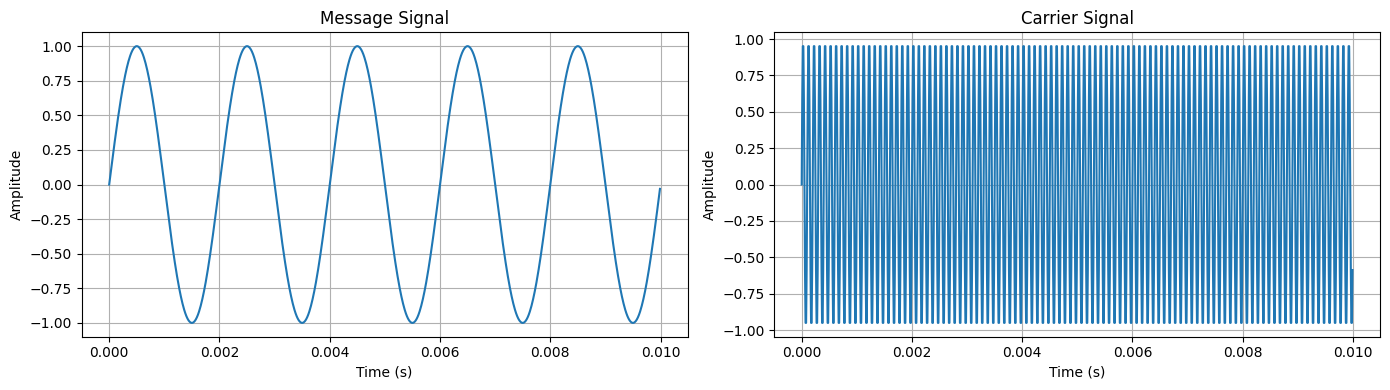

In [25]:
# Message signal (baseband)
message = np.sin(2 * np.pi * fm * time_array)

# Carrier signal
carrier = Amplitude *np.sin(2 * np.pi * fc * time_array)


fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Plot message signal
axs[0].plot(time_array, message)
axs[0].set_title("Message Signal")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

# Plot carrier signal
axs[1].plot(time_array, carrier)
axs[1].set_title("Carrier Signal")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].grid(True)

plt.tight_layout()
plt.show()

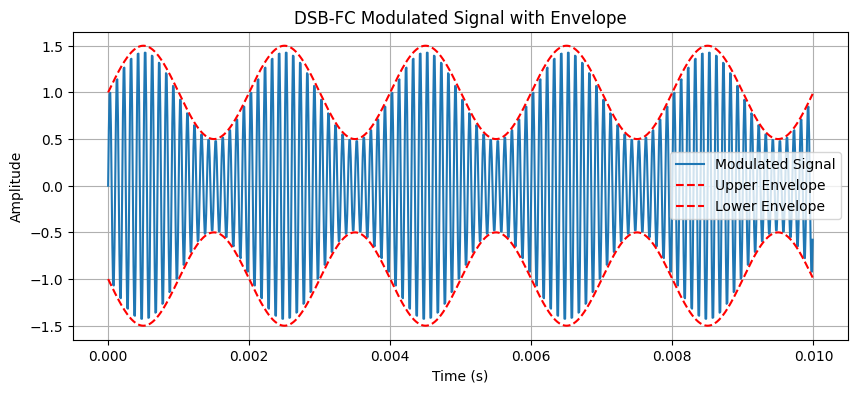

In [26]:
# double sideband full carrier
s_dsb_fc = (1 + ka * message) * carrier

plt.figure(figsize=(10, 4))
plt.plot(time_array, s_dsb_fc, label='Modulated Signal')
# Envelope (approximate visual guide)
plt.plot(time_array, Amplitude * (1 + ka * message), 'r--', label='Upper Envelope')
plt.plot(time_array, -Amplitude * (1 + ka * message), 'r--', label='Lower Envelope')
plt.title("DSB-FC Modulated Signal with Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

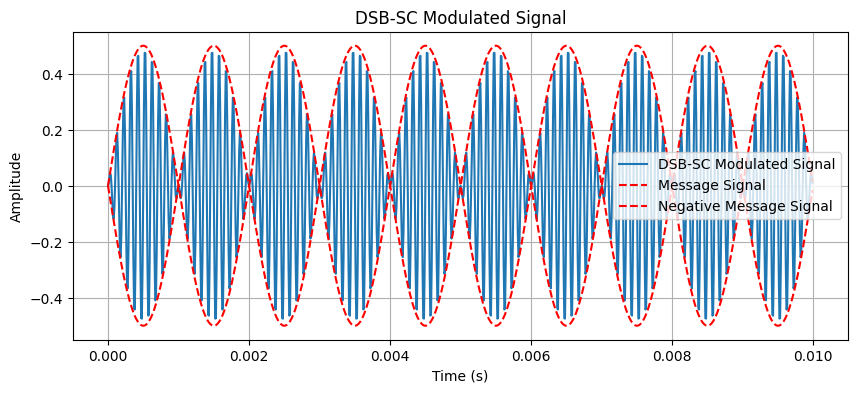

In [27]:
# 2. Double Sideband Suppressed Carrier (DSB-SC) - NO carrier
s_dsb_sc = ka * message * carrier

plt.figure(figsize=(10, 4))
plt.plot(time_array, s_dsb_sc, label='DSB-SC Modulated Signal')
plt.plot(time_array, ka * message, 'r--', label='Message Signal')
plt.plot(time_array, -ka * message, 'r--', label='Negative Message Signal')
plt.title("DSB-SC Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Amplitude')

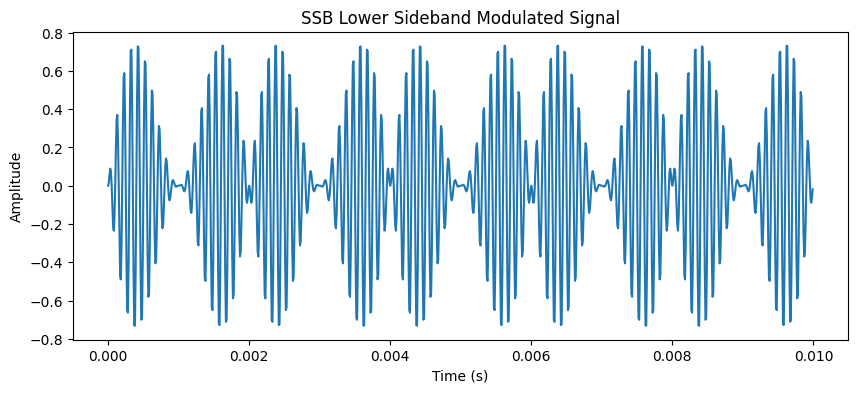

In [28]:
from scipy.signal import hilbert


# 3. SSB-SC (Single Sideband, Upper) - Remove lower sideband
# Hilbert transform for analytic signal
m_hilbert = np.imag(np.fft.ifft(np.fft.fft(message) * (np.fft.fft(message) >= 0).astype(complex)))
m_ssb_upper = message * np.cos(np.pi*fm*time_array) - m_hilbert * np.sin(np.pi*fm*time_array)
s_ssb_sc = m_ssb_upper * carrier

# 4. SSB-SC (Lower Sideband)
m_ssb_lower = message * np.cos(np.pi*fm*time_array) + m_hilbert * np.sin(np.pi*fm*time_array)
s_ssb_lower = m_ssb_lower * carrier

s_ssb_upper = m_ssb_upper * carrier

plt.figure(figsize=(10, 4))
plt.plot(time_array, s_ssb_lower, label='SSB Lower Sideband')
plt.title("SSB Lower Sideband Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

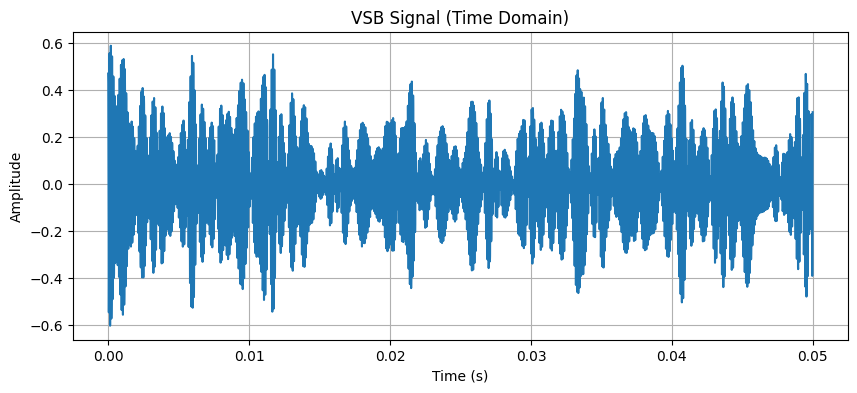

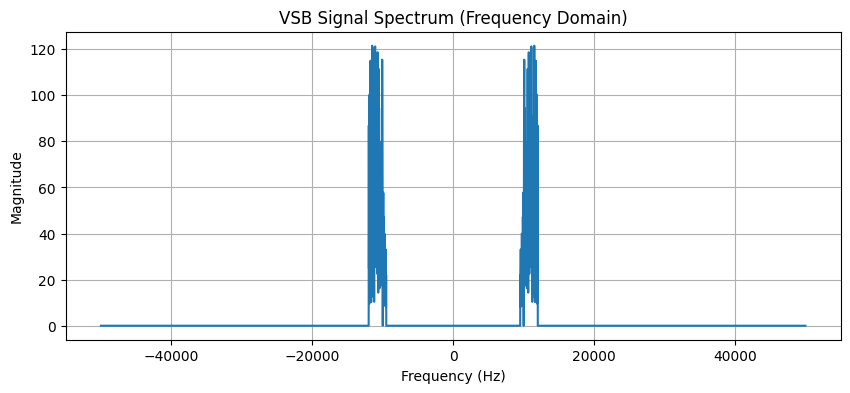

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
fs = 100_000          # Sampling frequency
T = 0.05              # Signal duration
t = np.arange(0, T, 1/fs)

fc = 10_000           # Carrier frequency
Bm = 2_000            # Message bandwidth (Hz)
vestige_bw = 500      # Vestigial bandwidth (Hz)

# -----------------------------
# Band-limited message signal
# -----------------------------
np.random.seed(0)
noise = np.random.randn(len(t))

N = len(noise)
freqs = np.fft.fftfreq(N, 1/fs)
M = np.fft.fft(noise)

# Ideal low-pass filter for message
M[np.abs(freqs) > Bm] = 0
m = np.real(np.fft.ifft(M))

# Normalize message
m /= np.max(np.abs(m))

# -----------------------------
# DSB-SC modulation
# -----------------------------
carrier = np.cos(2 * np.pi * fc * t)
s_dsb = m * carrier

# -----------------------------
# FFT of DSB signal
# -----------------------------
S = np.fft.fft(s_dsb)

# -----------------------------
# VSB filter (asymmetric)
# -----------------------------
H = np.zeros_like(freqs)

# Upper sideband (full)
H[(freqs > fc) & (freqs < fc + Bm)] = 1

# Lower sideband (vestige only)
H[(freqs > fc - vestige_bw) & (freqs < fc)] = 0.5

# Negative frequencies (mirror)
H[(freqs < -fc) & (freqs > -fc - Bm)] = 1
H[(freqs < -fc + vestige_bw) & (freqs > -fc)] = 0.5

# Apply VSB filter
S_vsb = S * H
s_vsb = np.real(np.fft.ifft(S_vsb))

# -----------------------------
# Time-domain plot
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(t, s_vsb)
plt.title("VSB Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# -----------------------------
# Frequency-domain plot
# -----------------------------
plt.figure(figsize=(10, 4))
plt.plot(
    np.fft.fftshift(freqs),
    np.abs(np.fft.fftshift(S_vsb))
)
plt.title("VSB Signal Spectrum (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()
